In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

# Feature Scaling
## Nếu scale 3 lần, lần lượt cho x1, x2, x3 thì sẽ gây sai sót! 
## Vì vậy, chỉ scale cho tất cả các field !, ko dc scale riêng lẻ từng field

### Thứ tự sử dụng: StandardScaler -> MinMaxScaler -> RobustScaler

# 1. Standard Scaler
- Dùng cho tất cả các field của df có pp chuẩn

In [4]:
# giá trị phát sinh là 1 đơn vị
np.random.seed(1)

In [6]:
# phát sinh data theo phân phối chuẩn

'''
loc: vị trí đỉnh: đỉnh phân phối ở đâu (defaut = 0)
scale: độ lệch chuẩn (std)
size: số ptu
'''
df = pd.DataFrame({
    'x1': np.random.normal(loc=0, scale=2, size=10000),
    'x2': np.random.normal(loc=5, scale=3, size=10000),
    'x3': np.random.normal(loc=-5, scale=5, size=10000)
})
df.head()

,x1,x2,x3
0,0.772110,6.950540,-9.469424
1,-0.998305,-0.294840,-6.859449
2,2.572975,11.873012,-4.023350
3,-0.704427,8.972881,-11.282119
4,4.485803,7.113025,-5.940483


In [11]:
df.x3.std()

5.024676554468496

### Visualization

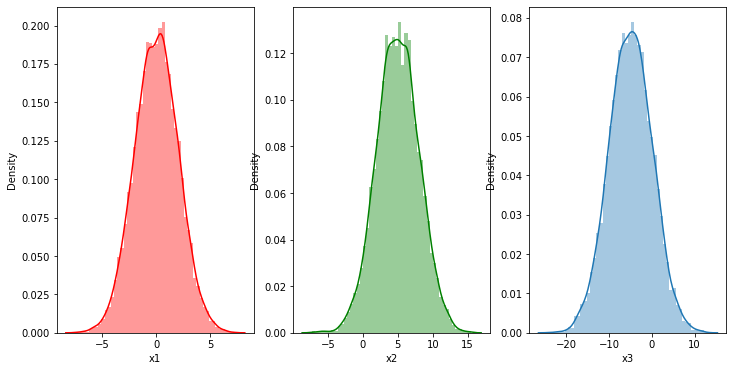

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.distplot(df['x1'], color = 'red')

plt.subplot(1,3,2)
sns.distplot(df['x2'], color = 'green')
plt.subplot(1,3,3)

sns.distplot(df['x3'])
plt.show()


In [14]:
df['x1'].skew(), df['x2'].skew(), df['x3'].skew()

(-0.00796822728521279, -0.03484271976889774, 0.0016687400475934645)

In [15]:
'''
độ lệch của nó rất nhỏ
=> xấp xỉ chuẩn (=0 là chuẩn:))
'''

'\nđộ lệch của nó rất nhỏ\n=> xấp xỉ chuẩn (=0 là chuẩn:))\n'

In [16]:
df['x1'].mean(), df['x2'].mean(), df['x3'].mean()

(0.03183088278421247, 4.995267373979405, -4.957862503264592)

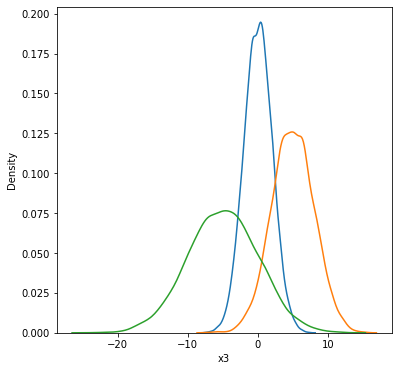

In [18]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6)) # 1 dòng 1 cột
sns.distplot(df['x1'], ax=ax1, hist=False)
sns.distplot(df['x2'], ax=ax1, hist=False)
sns.distplot(df['x3'], ax=ax1, hist=False)
plt.show()

In [19]:
'''
3 thuộc tính này nằm ở 3 đỉnh khác nhau vì 3 thuộc tính có 3 thang đo khác nhauu
'''

'\n3 thuộc tính này nằm ở 3 đỉnh khác nhau vì 3 thuộc tính có 3 thang đo khác nhauu\n'

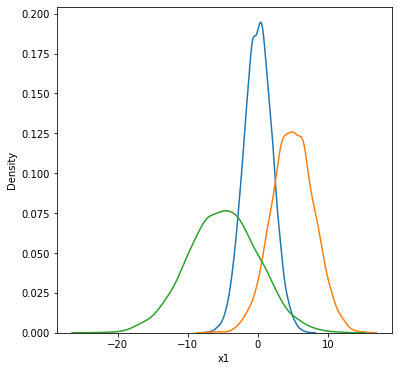

In [20]:
# tương tự cái biểu đồ trên hoyy
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
plt.show()

In [21]:
# 3 thuộc tích x1, x2 và x3 có sự chênh lệch về độ lớn -> cần chuẩn hóa 
# do 3 thuộc tính đều có dạng phân phối chuẩn (sấp xỉ chuẩn) -> StandarScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
#khởi tạo đối tượng Scaler
scaler = StandardScaler()

In [30]:
# scale dữ liệu trên tập 3 thuộc tính x1, x2 và x3 
# ko dc tách ra :))
df_scale = scaler.fit_transform(df)
df_scale

array([[ 0.36915482,  0.64885199, -0.89792591],
       [-0.51369751, -1.755508  , -0.37846847],
       [ 1.26719197,  2.28236085,  0.18599386],
       ...,
       [ 1.21198183, -0.58677663,  1.86596765],
       [ 0.64567955,  0.92099462,  0.04631059],
       [ 0.02678214,  0.79058615, -0.63401828]])

In [31]:
# chuyển df_scale về dạng DataFrame
df_scale = pd.DataFrame(df_scale, columns = df.columns) #df.columns là 3 cột x1, x2, x3
df_scale.head()

,x1,x2,x3
0,0.369155,0.648852,-0.897926
1,-0.513698,-1.755508,-0.378468
2,1.267192,2.282361,0.185994
3,-0.367150,1.319960,-1.258703
4,2.221061,0.702772,-0.195569


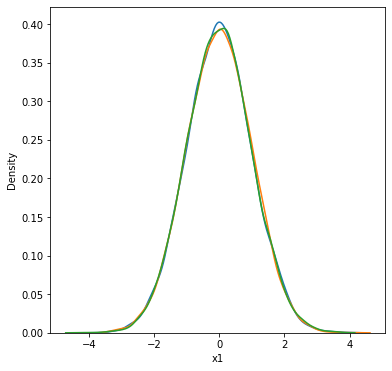

In [17]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.kdeplot(df_scale['x1'], ax=ax1)
sns.kdeplot(df_scale['x2'], ax=ax1)
sns.kdeplot(df_scale['x3'], ax=ax1)
plt.show()

In [32]:
'''
Nhận xét: 3 phân phối này gần như trùng nhau á:)) (cùng 1 trục, ...)
'''

'\nNhận xét: 3 phân phối này gần như trùng nhau á:)) (cùng 1 trục, ...)\n'

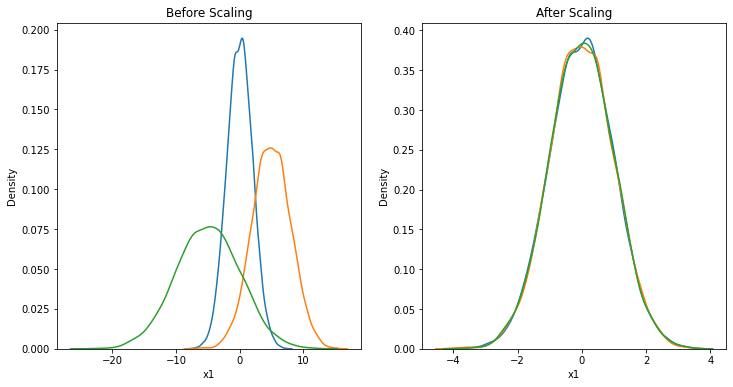

In [33]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['x1'], ax=ax2)
sns.kdeplot(df_scale['x2'], ax=ax2)
sns.kdeplot(df_scale['x3'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

### Trước khi Scale

In [34]:
print('Before Scaling:')
print('x1 mean:', df['x1'].mean(), '- x1 std:', df['x1'].std())
print('x2 mean:', df['x2'].mean(), '- x2 std:', df['x2'].std())
print('x3 mean:', df['x3'].mean(), '- x3 std:', df['x3'].std())

Before Scaling:
x1 mean: 0.03183088278421247 - x1 std: 2.005435135850292
x2 mean: 4.995267373979405 - x2 std: 3.013584898811929
x3 mean: -4.957862503264592 - x3 std: 5.024676554468496


### Sau khi Scale

In [35]:
print('After Scaling:')
print('x1 mean:', df_scale['x1'].mean(), '- x1 std:', df_scale['x1'].std())
print('x2 mean:', df_scale['x2'].mean(), '- x2 std:', df_scale['x2'].std())
print('x3 mean:', df_scale['x3'].mean(), '- x3 std:', df_scale['x3'].std())

After Scaling:
x1 mean: -4.263256414560601e-18 - x1 std: 1.0000500037503124
x2 mean: -3.9470648971473567e-16 - x2 std: 1.0000500037503124
x3 mean: -1.1510792319313622e-16 - x3 std: 1.0000500037503126


In [ ]:
'''
sau khi scale: std ~ 1 và mean ~ 0
theo như pp chuẩn tắc
do cùng tỉ lệ scale ... 

### nếu scale 3 lần, lần lượt cho x1, x2, x3 thì sẽ gây sai sót! 
'''

In [21]:
print('Before scaling:')
df.corr()

Before scaling:


,x1,x2,x3
x1,1.000000,0.015684,0.006019
x2,0.015684,1.000000,0.003686
x3,0.006019,0.003686,1.000000


In [22]:
print('After scaling:')
df_scale.corr()

After scaling:


,x1,x2,x3
x1,1.000000,0.015684,0.006019
x2,0.015684,1.000000,0.003686
x3,0.006019,0.003686,1.000000


# 2. MinMaxScaler 
- Dùng cho pp ko chuẩn
##  Chỉ dùng khi ko có Outliers

In [36]:
df = pd.read_csv('data/Data_for_Values.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,45000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [37]:
df_new = df[['Age', 'Salary']]
df_new

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,45000
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


### Ktra phân phối

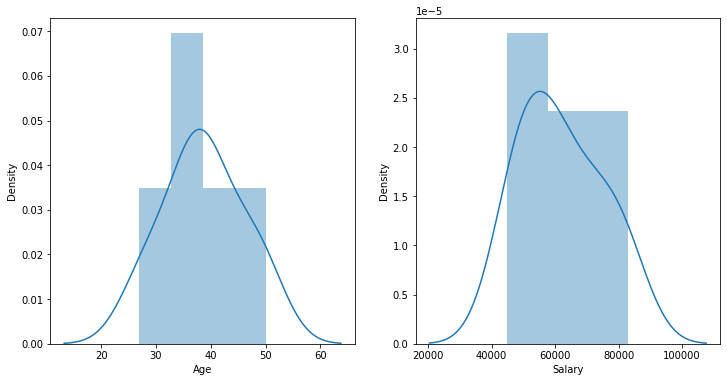

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df_new['Age'])
plt.subplot(1,2,2)
sns.distplot(df_new['Salary'])
plt.show()

In [39]:
# không phải là phân phối chuẩn -> không sử dụng StandardScaler

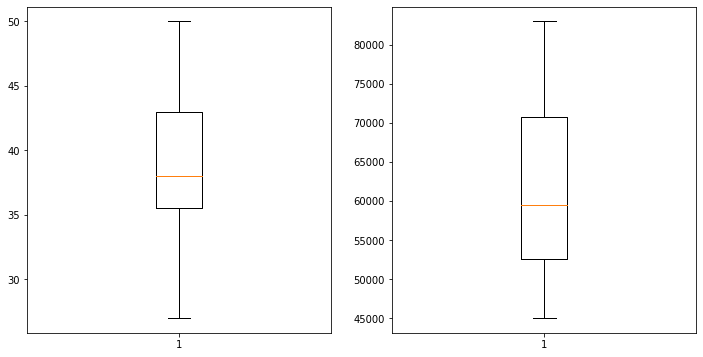

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_new['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_new['Salary'])
plt.show()

In [41]:
'''
Vì các field này ko có outliers và ko theo pp chuẩn
=> dùng MinMaxScaler
'''

'\nVì các field này ko có outliers và ko theo pp chuẩn\n=> dùng MinMaxScaler\n'

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# khởi tạo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [44]:
df_scale = scaler.fit_transform(df_new)
df_scale

array([[0.73913043, 0.71052632],
       [0.        , 0.07894737],
       [0.13043478, 0.23684211],
       [0.47826087, 0.42105263],
       [0.56521739, 0.        ],
       [0.34782609, 0.34210526],
       [0.47826087, 0.18421053],
       [0.91304348, 0.89473684],
       [1.        , 1.        ],
       [0.43478261, 0.57894737]])

In [45]:
df_scale = pd.DataFrame(df_scale, columns=df_new.columns)
df_scale

,Age,Salary
0,0.739130,0.710526
1,0.000000,0.078947
2,0.130435,0.236842
3,0.478261,0.421053
4,0.565217,0.000000
5,0.347826,0.342105
6,0.478261,0.184211
7,0.913043,0.894737
8,1.000000,1.000000
9,0.434783,0.578947


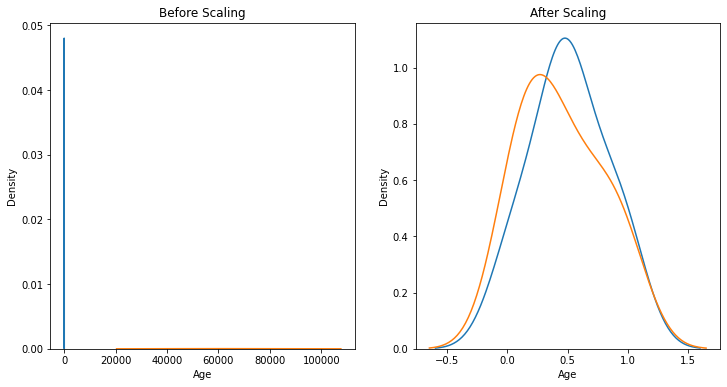

In [46]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df_new['Age'], ax=ax1)
sns.kdeplot(df_new['Salary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['Age'], ax=ax2)
sns.kdeplot(df_scale['Salary'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

In [47]:
'''
Before: Age và Desity nằm cách xa nhauu
After: 2 feater này kéo về cùng 1 trục, nhìn đẹp hơn wa trờiii
'''

'\nBefore: Age và Desity nằm cách xa nhauu\nAfter: 2 feater này kéo về cùng 1 trục, nhìn đẹp hơn wa trờiii\n'

In [48]:
print('Before Scaling')
print('Age min:', df_new['Age'].min(), ' - Age max:', df_new['Age'].max())
print('Salary min:', df_new['Salary'].min(), ' - Salary max:', df_new['Salary'].max())

Before Scaling
Age min: 27  - Age max: 50
Salary min: 45000  - Salary max: 83000


In [49]:
print('After Scaling')
print('Age min:', df_scale['Age'].min(), ' - Age max:', df_scale['Age'].max())
print('Salary min:', df_scale['Salary'].min(), ' - Salary max:', df_scale['Salary'].max())

After Scaling
Age min: 0.0  - Age max: 1.0
Salary min: 0.0  - Salary max: 0.9999999999999998


In [52]:
'''
After: range của các field (age và salary) = [0,1] (do các values đều dương)
'''

'\nAfter: range của các field (age và salary) = [0,1] (do các values đều dương)\n'

In [50]:
print('Before Scaling')
df_new.corr()

Before Scaling


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000


In [51]:
print('After Scaling')
df_scale.corr()

After Scaling


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000


In [53]:
'''
Hệ số tương quan before và after ko thay đổi !
'''

'\nHệ số tương quan before và after ko thay đổi !\n'

# 3. RobustScaler 
- Dùng cho pp ko chuẩn
- Và có Outliers

In [55]:
df=pd.read_csv('data/Data_for_Values_1.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,20000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [56]:
df_new = df[['Age', 'Salary']]
df_new

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,20000
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


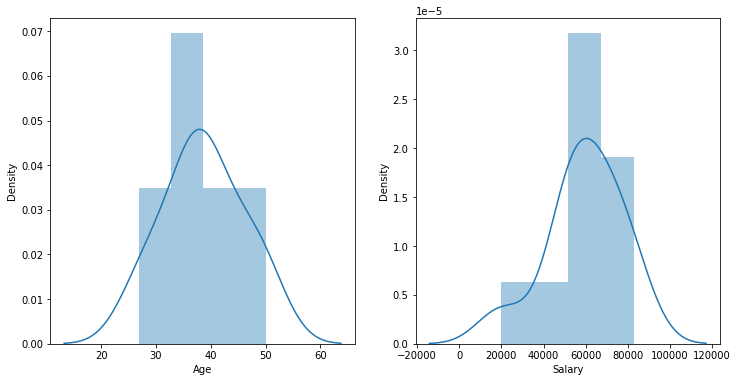

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df_new['Age'])
plt.subplot(1,2,2)
sns.distplot(df_new['Salary'])
plt.show()

In [59]:
'''
=> dữ liệu ko phải phân phối chuẩn
-> không sử dụng StandardScaler
'''

'\n=> dữ liệu ko phải phân phối chuẩn\n-> không sử dụng StandardScaler\n'

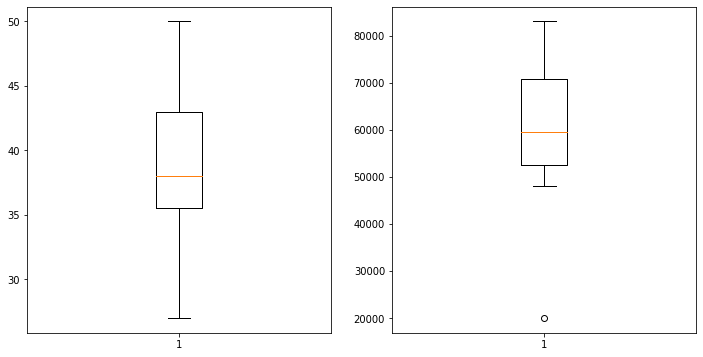

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_new['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_new['Salary'])
plt.show()

In [61]:
# có ouliers -> không sử dụng MinMaxScaler
# --> sử dụng RobustScaler

In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
#khởi tạo đối tưởng scaler
scaler = RobustScaler()

In [64]:
# scale data
df_scale = scaler.fit_transform(df_new)
df_scale

array([[ 0.8       ,  0.68493151],
       [-1.46666667, -0.63013699],
       [-1.06666667, -0.30136986],
       [ 0.        ,  0.08219178],
       [ 0.26666667, -2.16438356],
       [-0.4       , -0.08219178],
       [ 0.        , -0.4109589 ],
       [ 1.33333333,  1.06849315],
       [ 1.6       ,  1.28767123],
       [-0.13333333,  0.4109589 ]])

In [66]:
# chuyển về dataframe
df_scale = pd.DataFrame(df_scale, columns = df_new.columns)
df_scale

,Age,Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-2.164384
5,-0.400000,-0.082192
6,0.000000,-0.410959
7,1.333333,1.068493
8,1.600000,1.287671
9,-0.133333,0.410959


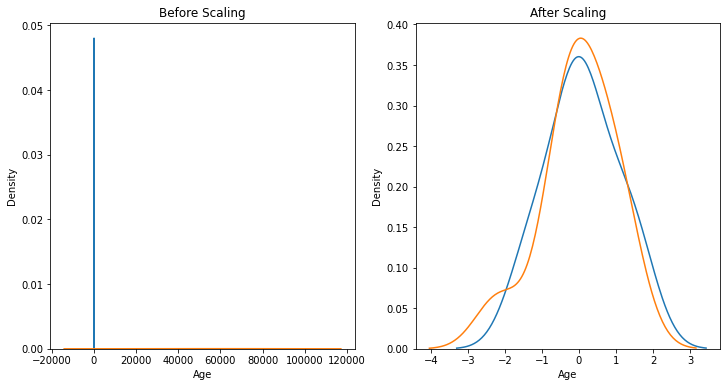

In [67]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df_new['Age'], ax=ax1)
sns.kdeplot(df_new['Salary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['Age'], ax=ax2)
sns.kdeplot(df_scale['Salary'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

In [68]:
'''
Before: 2 đường phân phối chệnh lệch nhau lớn
After: 2 đường phân phối dc cải thiện
'''

'\nBefore: 2 đường phân phối chệnh lệch nhau lớn\nAfter: 2 đường phân phối dc cải thiện\n'

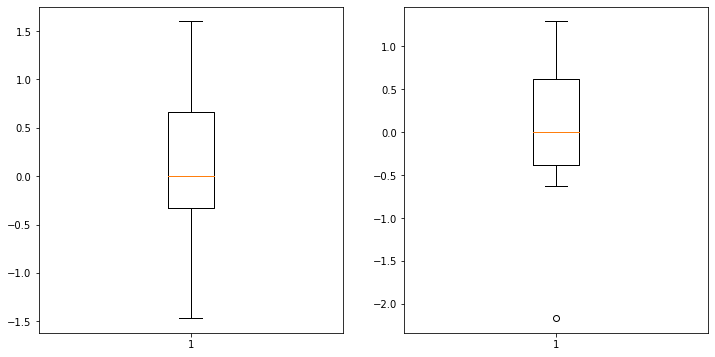

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_scale['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_scale['Salary'])
plt.show()

In [70]:
'''
Vẫn bảo toàn dc các outliers
'''

'\nVẫn bảo toàn dc các outliers\n'

In [71]:
print('Before Scaling')
df_new.corr()

Before Scaling


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [72]:
print('After Scaling')
df_scale.corr()

After Scaling


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [73]:
'''
Hệ số tương quan vẫn được bảo toàn
'''

'\nHệ số tương quan vẫn được bảo toàn\n'

# 4. Binarizer
- dùng để chia data ra theo các ngưỡng

In [85]:
arr = np.random.randint(-10, 10, size = (4, 4))
arr

array([[ 5,  4, -7, -4],
       [-8, -3,  3,  1],
       [ 3,  3, -1, -2],
       [-1,  9,  4, -3]])

In [86]:
from sklearn.preprocessing import Binarizer

In [89]:
# khởi tạo đối tượng scaler
# threshold=2 là giá trị ngưỡng
# nếu > 2 thì return 1
# nếu <=2 thì return 0

scaler = Binarizer(threshold=2) 

In [88]:
# data scaling
arr_scale = scaler.fit_transform(arr)
arr_scale

array([[1, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 1, 0]])

In [90]:
from PIL import Image

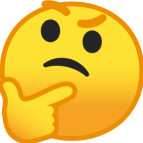

In [94]:
img = Image.open('data/face.png')
img

In [95]:
# chuyển img sang arr
img_arr = np.array(img)
img_arr.shape

(143, 143, 4)

In [98]:
'''
(143, 143, 4) nghĩa là có 4 layers, mỗi layers có 1 giá trị màu
'''

'\n(143, 143, 4) nghĩa là có 4 layers, mỗi layers có 1 giá trị màu\n'

In [100]:
layer0 = img_arr[:, :, 0] # lấy tất cả các dòng và cột và layer thứ 0

In [102]:
layer0.shape

(143, 143)

In [104]:
# mỗi phần tử tương ứng vs 1 mã màu
layer0[50:70, :10]

array([[  0,   0, 234, 235, 235, 235, 235, 244, 254, 254],
       [  0,   0, 235, 235, 235, 235, 235, 249, 254, 254],
       [  0, 232, 235, 235, 235, 235, 237, 252, 254, 254],
       [  0, 235, 235, 235, 235, 235, 242, 254, 254, 254],
       [  0, 236, 235, 235, 235, 235, 245, 254, 254, 254],
       [  0, 235, 235, 235, 235, 235, 249, 254, 254, 254],
       [255, 235, 235, 235, 235, 236, 252, 254, 254, 254],
       [235, 235, 235, 235, 235, 239, 253, 254, 254, 254],
       [236, 235, 235, 235, 235, 241, 254, 254, 254, 254],
       [236, 235, 235, 235, 235, 244, 254, 254, 254, 254],
       [234, 235, 235, 235, 235, 247, 254, 254, 254, 254],
       [235, 235, 235, 235, 235, 249, 254, 254, 254, 254],
       [235, 235, 235, 235, 235, 252, 254, 254, 254, 254],
       [235, 235, 235, 235, 236, 253, 254, 254, 254, 254],
       [234, 235, 235, 235, 237, 253, 254, 254, 254, 254],
       [235, 235, 235, 235, 239, 253, 254, 254, 254, 254],
       [235, 235, 235, 235, 240, 253, 254, 254, 254, 254

In [105]:
layer1 = img_arr[:, :, 1]

In [106]:
layer1[50:70, :10]

array([[  0,   0, 142, 143, 143, 143, 143, 185, 225, 225],
       [  0,   0, 142, 143, 143, 143, 143, 203, 225, 225],
       [  0, 139, 143, 143, 143, 143, 153, 219, 225, 225],
       [  0, 142, 143, 143, 143, 143, 171, 223, 225, 225],
       [  0, 144, 143, 143, 143, 143, 185, 225, 225, 225],
       [  0, 144, 143, 143, 143, 143, 202, 225, 225, 225],
       [255, 143, 143, 143, 143, 149, 216, 225, 225, 225],
       [147, 143, 143, 143, 143, 161, 222, 225, 225, 225],
       [142, 143, 143, 143, 143, 171, 223, 225, 225, 225],
       [143, 143, 143, 143, 143, 182, 225, 225, 225, 225],
       [142, 143, 143, 143, 143, 193, 225, 225, 225, 225],
       [142, 143, 143, 143, 143, 204, 225, 225, 225, 225],
       [143, 143, 143, 143, 143, 214, 225, 225, 225, 225],
       [143, 143, 143, 143, 147, 219, 225, 225, 225, 225],
       [143, 143, 143, 143, 152, 221, 225, 225, 225, 225],
       [143, 143, 143, 143, 159, 222, 225, 225, 225, 225],
       [143, 143, 143, 143, 164, 222, 224, 224, 224, 224

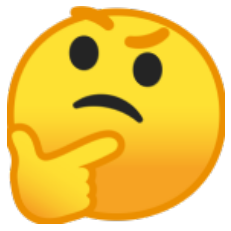

In [107]:
plt.imshow(img_arr, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Áp dụng binarizer


In [108]:
scale3 = Binarizer(threshold=150) # giá trị ngưỡng là 150

In [110]:
layer0_scale = scale3.fit_transform(layer0)

In [111]:
layer1_scale[50:70, :10]

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [112]:
img_arr[:, :, 0] = layer0_scale

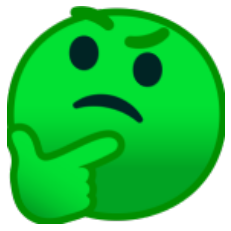

In [113]:
plt.imshow(img_arr, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [114]:
layer1_scale = scale3.fit_transform(layer1)

In [116]:
layer1_scale[50:70, :10]

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [118]:
img_arr[:, :, 1] = layer1_scale

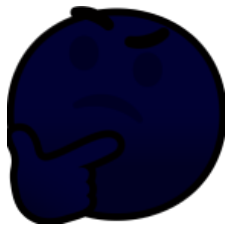

In [119]:
plt.imshow(img_arr, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
'''
Vì ko quan tâm tới màu sắc, chỉ quan tâm tới hình dạng nên ngta chia như vậy
'''